In [1]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
#import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
import networkx as nx

In [2]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
grangercausalitytests(x, maxlag, addconst=True, verbose=None)

In [14]:
import h5py
f = h5py.File('12RegionsConnectomeWalk.h5', 'r')
NameList=f['NameList'][:]
InvCovMat12Rnw=f['InvCovMat12Rnw'][:]
InvCovMat12Rw=f['InvCovMat12Rw'][:]

In [15]:
NameList=[str(a).split("'")[1] for a in NameList]

In [16]:
Gw = nx.Graph()
for node in NameList:
    Gw.add_node(node)
    
for i in range(12):
    for j in range(12):
        Gw.add_edge(NameList[i],NameList[j], weight=5*InvCovMat12Rw[i,j]/np.max(np.max(InvCovMat12Rw)))

In [17]:
Gnw = nx.Graph()
for node in NameList:
    Gnw.add_node(node)
    
for i in range(12):
    for j in range(12):
        Gnw.add_edge(NameList[i],NameList[j], weight=5*InvCovMat12Rnw[i,j]/np.max(np.max(InvCovMat12Rnw)))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


{'AL': Text(-0.540166612613631, 0.42255357058646287, 'AL'),
 'MB': Text(0.21850174117563143, 0.3335285061931613, 'MB'),
 'SNP': Text(0.24523279115550028, 0.8590960595613522, 'SNP'),
 'LH': Text(1.0, -0.20776048952663811, 'LH'),
 'INP': Text(-0.03415464678367523, 0.08071761423832, 'INP'),
 'CX': Text(0.3628644865737332, -0.38097535960851814, 'CX'),
 'LX': Text(-0.20804306119540047, 0.693420354283564, 'LX'),
 'PENP': Text(-0.32930033477570547, -0.27662886343817955, 'PENP'),
 'GNG': Text(0.10163538266715583, -0.987010698503505, 'GNG'),
 'VMNP': Text(-0.9129321238858042, 0.049757760745749016, 'VMNP'),
 'VLNP': Text(0.7042701378108674, 0.2100412384356722, 'VLNP'),
 'OL': Text(-0.6079077601286732, -0.7967396929674376, 'OL')}

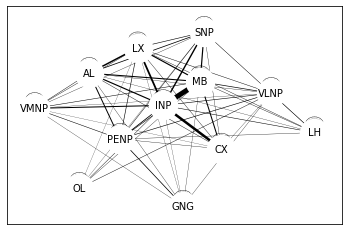

In [18]:
pos=nx.spring_layout(Gw,weight='weight')
nx.draw_networkx_nodes(Gw, pos, node_size=700,linewidths=3,node_color=[1,1,1])
for edge in Gw.edges(data='weight'):
    if edge[0]!=edge[1] and edge[2]>0.2:
        nx.draw_networkx_edges(Gw,pos, edgelist=[edge], width=edge[2])
nx.draw_networkx_labels(Gw, pos, font_size=10, font_family="sans-serif")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


{'AL': Text(-0.6537524317935279, 0.6604914587200255, 'AL'),
 'MB': Text(0.6731842151416543, 0.6111513985993913, 'MB'),
 'SNP': Text(0.3037906619141823, 0.9362824379950563, 'SNP'),
 'LH': Text(0.9779645639912401, -0.3137466463849296, 'LH'),
 'INP': Text(-0.7642202710836699, 0.25034740282914586, 'INP'),
 'CX': Text(0.6212760858909627, -0.709473598291598, 'CX'),
 'LX': Text(-0.21708403943259588, 0.9202202233532555, 'LX'),
 'PENP': Text(-0.6974438811856696, -0.5599405349374839, 'PENP'),
 'GNG': Text(0.17095048816377614, -1.0, 'GNG'),
 'VMNP': Text(-0.9640997333805554, -0.09833309600316908, 'VMNP'),
 'VLNP': Text(0.9517943142147435, 0.2122049770038988, 'VLNP'),
 'OL': Text(-0.4023599724405403, -0.9092040228835924, 'OL')}

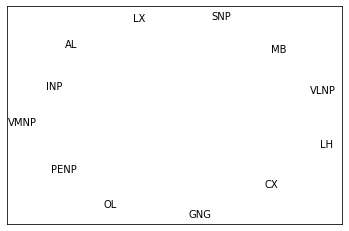

In [19]:
pos=nx.spring_layout(Gnw,weight='weight',pos=pos)
nx.draw_networkx_nodes(Gnw, pos, node_size=700,linewidths=3,node_color=[1,1,1])
for edge in Gnw.edges(data='weight'):
    if edge[0]!=edge[1] and edge[2]>0.2:
        nx.draw_networkx_edges(Gnw,pos, edgelist=[edge], width=edge[2])
nx.draw_networkx_labels(Gnw, pos, font_size=10, font_family="sans-serif")

In [ ]:
import h5py
f = h5py.File('ComponentConnectome.h5', 'r')
NameList=f['NameList'][:]
OccMat=f['OccurenceMatrix'][:]
InvCovMat=f['InvCovMat'][:]
CovMat=f['CovMat'][:]

In [ ]:
G = nx.Graph()
for node in Compdf.CompID.unique():
    G.add_node(node)
G.add_edge(1, 2, weight=4.7 )